In [1]:
# 导入依赖函数库

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# 数据集的目录位置

train_dir = "dataset/train"
valid_dir = "dataset/validation"
test_dir = "dataset/test"

# 总分类数
num_classes = 10

In [3]:
# 构造图片数据生成器方法，包括数据增强

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,    # [0,255] => [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, #修剪
    zoom_range=0.2, #缩放
    horizontal_flip=True, #翻转
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [4]:
#构造图片数据生成器

train_generator = train_datagen.flow_from_directory(
    train_dir, #图片目录
    target_size=(224, 224), #转换图片大小
    batch_size=32, #训练中每个mini-batch大小
    class_mode="categorical" #分类问题，不同目录代表不同的分类
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [5]:
# 定义模型 -- 卷积神经网络

import tensorflow as tf  # tensorflow

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=[224,224,3]),   #卷积层1， 用3x3卷积核，relu激活函数, feature map: 8 input 224x224x3 output: 222x222x8
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #池化2x2  output: 111x111x8
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'), #卷积层2， 用3x3卷积核，relu激活函数, feature map: 16 input 111x111x8 output: 109x109x16
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #池化2x2  output: 54x54x16
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),  #卷积层3， 用3x3卷积核，relu激活函数, feature map: 32 input 54x54x16 output: 52x52x32
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),  #池化2x2  output: 26x26x32
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),  #卷积层4， 用3x3卷积核，relu激活函数, feature map: 64 input 26x26x32 output: 24x24x64
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #池化2x2  output: 12x12x64
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),  #卷积层5， 用3x3卷积核，relu激活函数, feature map: 128 input 12x12x64 output: 10x10x128
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #池化2x2  output: 5x5x128
  tf.keras.layers.Flatten(input_shape=[5,5,128]),
  tf.keras.layers.Dense(1024, activation="relu"), #1024的全连接网络
  tf.keras.layers.Dense(36, activation="softmax") #10分类概率分布
])

In [6]:
# 定义模型的损失函数， 优化算法（如何调整参数以降低损失），评价指标：准确率
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [8]:
# 训练过程： steps = 总图片数 / batch_size, epoch：训练轮次

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=200
)

Epoch 1/200
 7/97 [=>............................] - ETA: 2:26 - loss: 3.5871 - accuracy: 0.0134

c:\Users\zhfall\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


97/97 [==============================] - 166s 2s/step - loss: 3.5072 - accuracy: 0.0503 - val_loss: 3.2437 - val_accuracy: 0.0781
Epoch 2/200
97/97 [==============================] - 163s 2s/step - loss: 3.1815 - accuracy: 0.0954 - val_loss: 2.8473 - val_accuracy: 0.2219
Epoch 3/200
97/97 [==============================] - 163s 2s/step - loss: 2.9890 - accuracy: 0.1333 - val_loss: 2.6701 - val_accuracy: 0.1594
Epoch 4/200
97/97 [==============================] - 163s 2s/step - loss: 2.8858 - accuracy: 0.1573 - val_loss: 2.5316 - val_accuracy: 0.2500
Epoch 5/200
97/97 [==============================] - 164s 2s/step - loss: 2.8108 - accuracy: 0.1713 - val_loss: 2.3979 - val_accuracy: 0.2812
Epoch 6/200
97/97 [==============================] - 164s 2s/step - loss: 2.7468 - accuracy: 0.1943 - val_loss: 2.3075 - val_accuracy: 0.2812
Epoch 7/200
97/97 [==============================] - 163s 2s/step - loss: 2.6594 - accuracy: 0.2086 - val_loss: 2.2009 - val_accuracy: 0.3156
Epoch 8/200
97/97 

In [9]:
# 显示每轮的指标

history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,3.507180,0.050276,3.243653,0.078125
1,3.181486,0.095362,2.847269,0.221875
2,2.988991,0.133312,2.670084,0.159375
3,2.885833,0.157314,2.531627,0.250000
4,2.810782,0.171262,2.397886,0.281250
...,...,...,...,...
195,0.331347,0.884852,0.485589,0.881250
196,0.349577,0.882906,0.314305,0.900000
197,0.325111,0.890042,0.301739,0.928125
198,0.319670,0.892637,0.250490,0.925000


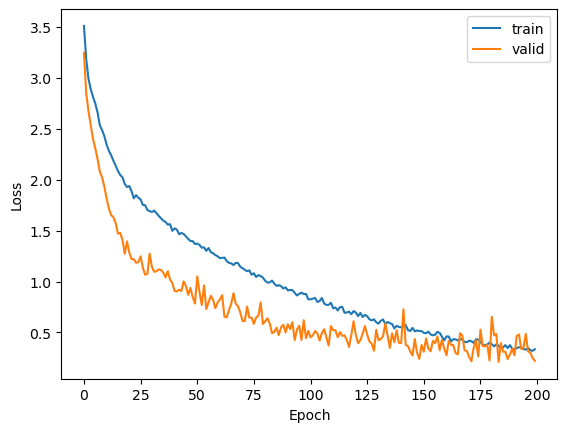

In [10]:
# 画出损失图，x轴：epoch, y轴：损失

import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

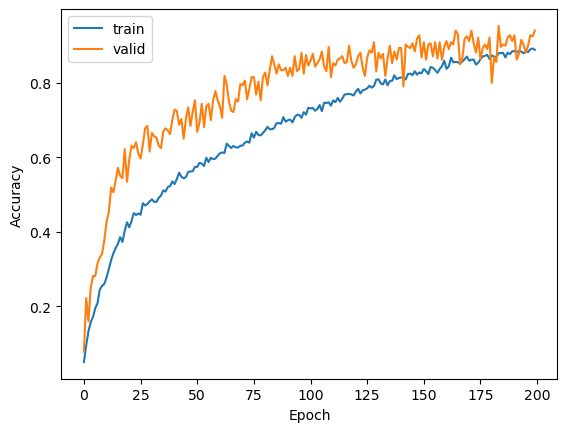

In [11]:
# 画出准确率曲线图，x轴：epoch, y轴：损失

plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

In [12]:
# 用测试集进行预测，结果是10类每一类的概率值

preds = model.predict(test_generator)

12/12 [==============================] - 18s 2s/step


In [13]:
# 取概率最大的类别为分类结果

y_pred = np.argmax(preds, axis=1)

In [14]:
# 打印出类别表

pred_classes = {}
for k, v in test_generator.class_indices.items():
    print(v, ":", k)
    pred_classes[v] = k

pred_classes

0 : apple
1 : banana
2 : beetroot
3 : bell pepper
4 : cabbage
5 : capsicum
6 : carrot
7 : cauliflower
8 : chilli pepper
9 : corn
10 : cucumber
11 : eggplant
12 : garlic
13 : ginger
14 : grapes
15 : jalepeno
16 : kiwi
17 : lemon
18 : lettuce
19 : mango
20 : onion
21 : orange
22 : paprika
23 : pear
24 : peas
25 : pineapple
26 : pomegranate
27 : potato
28 : raddish
29 : soy beans
30 : spinach
31 : sweetcorn
32 : sweetpotato
33 : tomato
34 : turnip
35 : watermelon


{0: 'apple',
 1: 'banana',
 2: 'beetroot',
 3: 'bell pepper',
 4: 'cabbage',
 5: 'capsicum',
 6: 'carrot',
 7: 'cauliflower',
 8: 'chilli pepper',
 9: 'corn',
 10: 'cucumber',
 11: 'eggplant',
 12: 'garlic',
 13: 'ginger',
 14: 'grapes',
 15: 'jalepeno',
 16: 'kiwi',
 17: 'lemon',
 18: 'lettuce',
 19: 'mango',
 20: 'onion',
 21: 'orange',
 22: 'paprika',
 23: 'pear',
 24: 'peas',
 25: 'pineapple',
 26: 'pomegranate',
 27: 'potato',
 28: 'raddish',
 29: 'soy beans',
 30: 'spinach',
 31: 'sweetcorn',
 32: 'sweetpotato',
 33: 'tomato',
 34: 'turnip',
 35: 'watermelon'}

In [15]:
# 定义类别编号和名称转换字典

# pred_classes = {
#     0 : "apple",
#     1 : "banana",
#     2 : "grapes",
#     3 : "kiwi",
#     4 : "mango",
#     5 : "orange",
#     6 : "pear",
#     7 : "pineapple",
#     8 : "pomegranate",
#     9 : "watermelon"
# }

In [16]:
# 给出预测结果的类别 

y_pred = list(map(lambda x: pred_classes[x], y_pred))

In [17]:
# 给出图片实际的类别 

y_test = list(map(lambda x: pred_classes[x], test_generator.classes))

In [18]:
# 基于预测结果，和对应的分类标签，给出分类结果评估

from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

               precision    recall  f1-score   support

        apple       0.80      1.00      0.89         8
       banana       0.78      1.00      0.88         7
     beetroot       1.00      1.00      1.00        10
  bell pepper       1.00      0.91      0.95        11
      cabbage       1.00      1.00      1.00        10
     capsicum       0.90      1.00      0.95         9
       carrot       1.00      0.91      0.95        11
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      1.00      1.00        10
         corn       0.50      0.83      0.62         6
     cucumber       1.00      0.91      0.95        11
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       0.90      0.90      0.90        10
       grapes       1.00      1.00      1.00        10
     jalepeno       1.00      0.91      0.95        11
         kiwi       0.80      1.00      0.89         8
        l

In [19]:
# 存储模型

model.save("cnn_lr_0.0001.h5")